**TITLE**: Nobel Prize analytics  
**AUTHOR**: Pablo Carrera Flórez de Quiñones  
**DATE**: December 2020  

# INTRODUCTION

## Statement of the problem

WIP

## References

https://www.nobelprize.org/about/developer-zone-2/

## Libraries

In [29]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

## Importing data

So, the first step in our project is to obtain the data of the laureates and the prices. We can obtain this data from the Nobel Prize API by running the script download_nobelprizes.py in utils folder.

In [72]:
# Import the data after running the script
data = pd.read_csv('data/nobelPrizes.csv')

# Show a sample of the data
data.head()

,Name,Gender,Birth date,Birth city,Birth country,Prize year,Prize category,Prize portion,Prize motivation,Prize amount,Prize amount adjusted,Affiliation institution,Affiliation city,Affiliation country
0,A. Michael Spence,male,1943-00-00,"Montclair, NJ",USA,2001,Economic Sciences,1/3,for their analyses of markets with asymmetric ...,10000000,12518033,Stanford University,"Stanford, CA",USA
1,Wilhelm Conrad Röntgen,male,1845-03-27,Remscheid,Germany,1901,Physics,1,in recognition of the extraordinary services h...,150782,8722510,Munich University,Munich,Germany
2,Hendrik A. Lorentz,male,1853-07-18,Arnhem,the Netherlands,1902,Physics,1/2,in recognition of the extraordinary service th...,141847,8205634,Leiden University,Leiden,the Netherlands
3,Pieter Zeeman,male,1865-05-25,Zonnemaire,the Netherlands,1902,Physics,1/2,in recognition of the extraordinary service th...,141847,8205634,Amsterdam University,Amsterdam,the Netherlands
4,Henri Becquerel,male,1852-12-15,Paris,France,1903,Physics,1/2,in recognition of the extraordinary services h...,141358,7936836,École Polytechnique,Paris,France


## EDA

Now, it is always a good idea to look for mising values at the data,

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     963 non-null    object
 1   Gender                   963 non-null    object
 2   Birth date               961 non-null    object
 3   Birth city               955 non-null    object
 4   Birth country            958 non-null    object
 5   Prize year               963 non-null    int64 
 6   Prize category           963 non-null    object
 7   Prize portion            963 non-null    object
 8   Prize motivation         963 non-null    object
 9   Prize amount             963 non-null    int64 
 10  Prize amount adjusted    963 non-null    int64 
 11  Affiliation institution  708 non-null    object
 12  Affiliation city         703 non-null    object
 13  Affiliation country      963 non-null    object
 14  Birth year               961 non-null    o

# ANALYTICS

## Gender

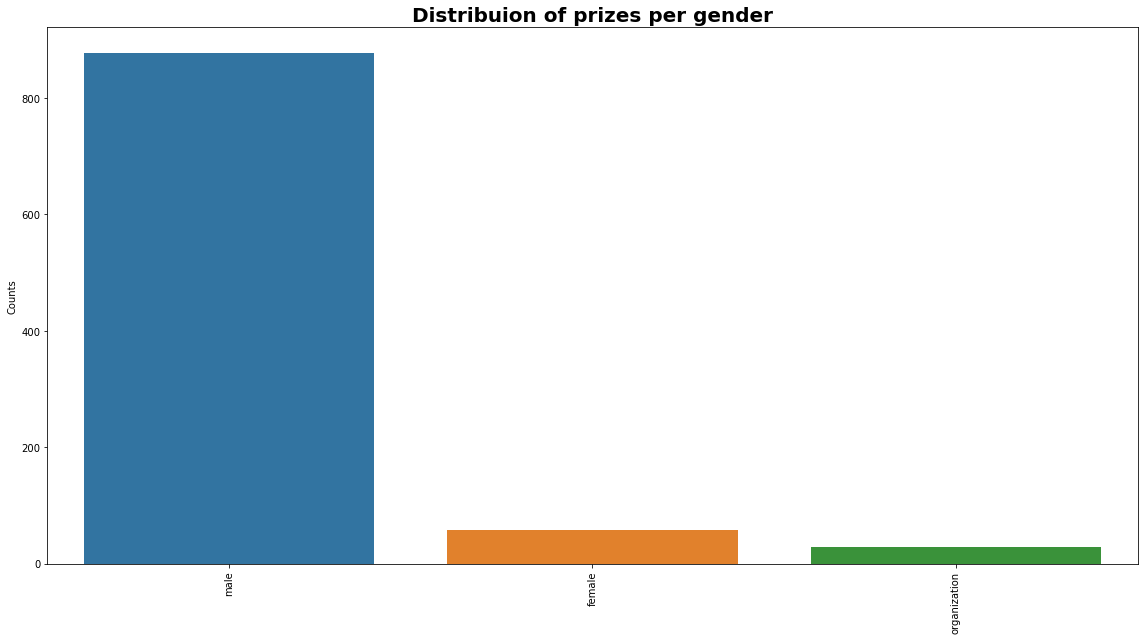

In [51]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.countplot(x='Gender',
              data=data,
              order=data['Gender'].value_counts().index,
              ax=ax
              )

# Formatting
ax.set_title('Distribuion of prizes per gender', weight='bold', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

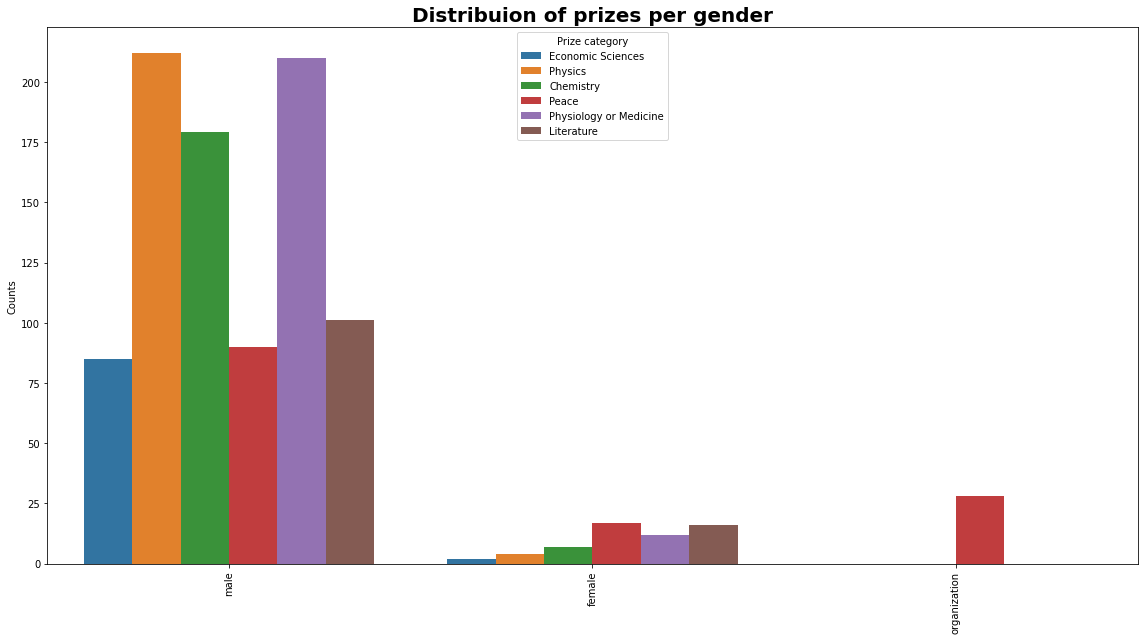

In [130]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.countplot(x='Gender',
              hue='Prize category',
              data=data,
              order=data['Gender'].value_counts().index,
              ax=ax
              )

# Formatting
ax.set_title('Distribuion of prizes per gender', weight='bold', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Country

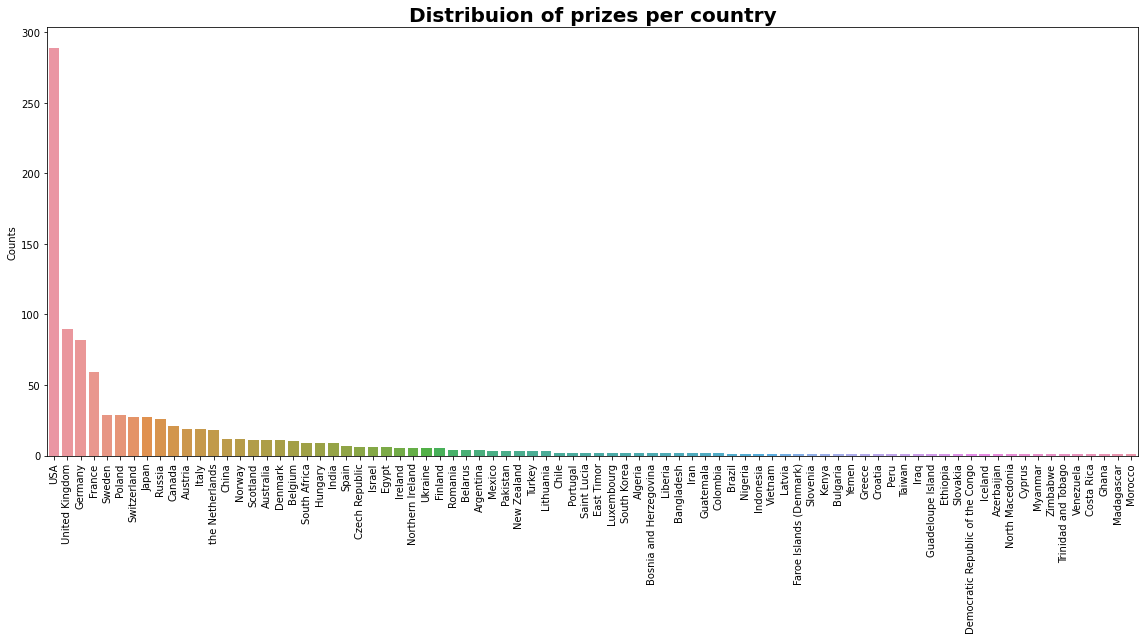

In [50]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.countplot(x='Birth country',
              data=data,
              order=data['Birth country'].value_counts().index,
              ax=ax
              )

# Formatting
ax.set_title('Distribuion of prizes per country', weight='bold', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

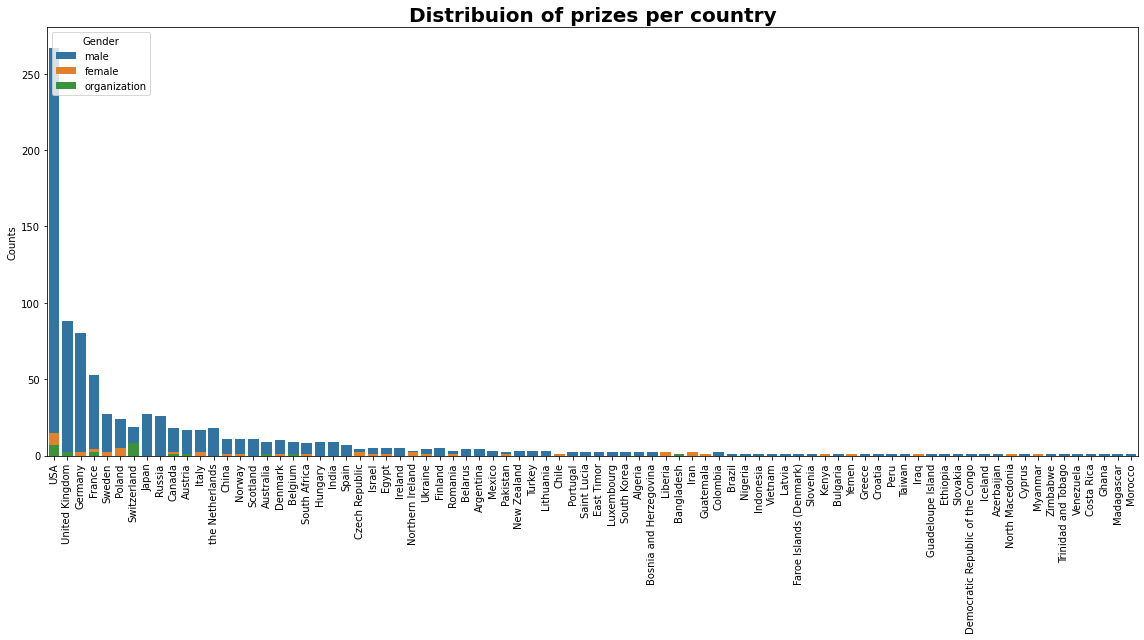

In [135]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.countplot(x='Birth country',
              hue='Gender',
              data=data,
              order=data['Birth country'].value_counts().index,
              dodge=False,
              ax=ax
              )

# Formatting
ax.set_title('Distribuion of prizes per country', weight='bold', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

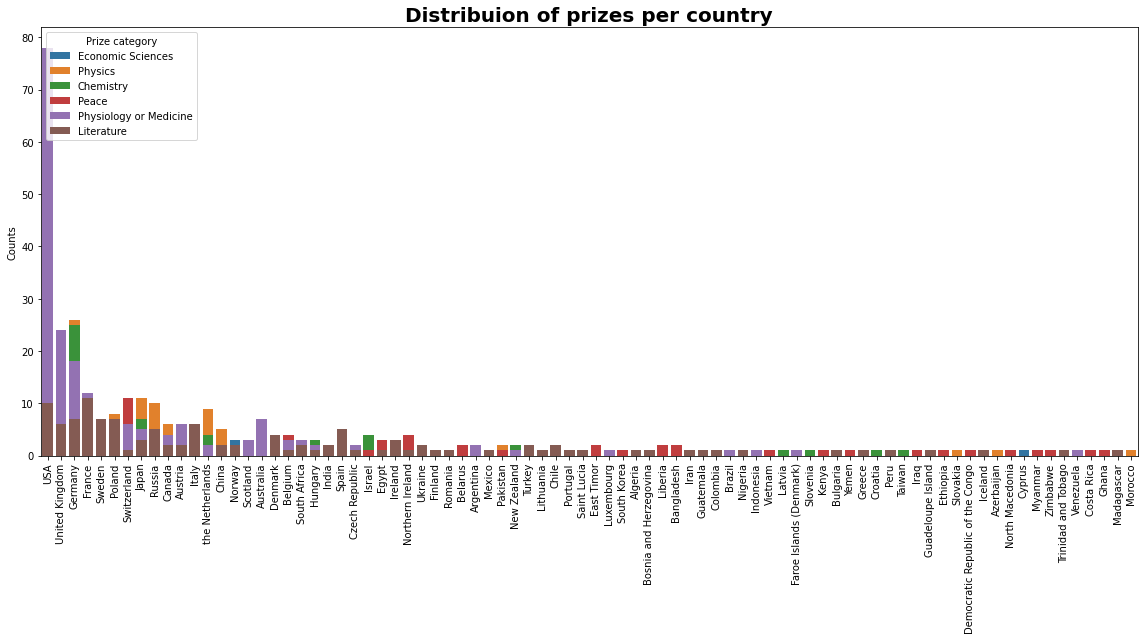

In [136]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.countplot(x='Birth country',
              hue='Prize category',
              data=data,
              order=data['Birth country'].value_counts().index,
              dodge=False,
              ax=ax
              )

# Formatting
ax.set_title('Distribuion of prizes per country', weight='bold', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Age

In [93]:
# Drop null values
df = data.dropna(subset=['Birth date'], axis=0).copy()

# Drop organizations
df = df[df['Gender'] != 'organization']

# Obtain birth year
df['Birth year'] = df['Birth date'].str[:4]

# Compute age of laureate
df['Age'] = df['Prize year'].astype('int') - df['Birth year'].astype('int')

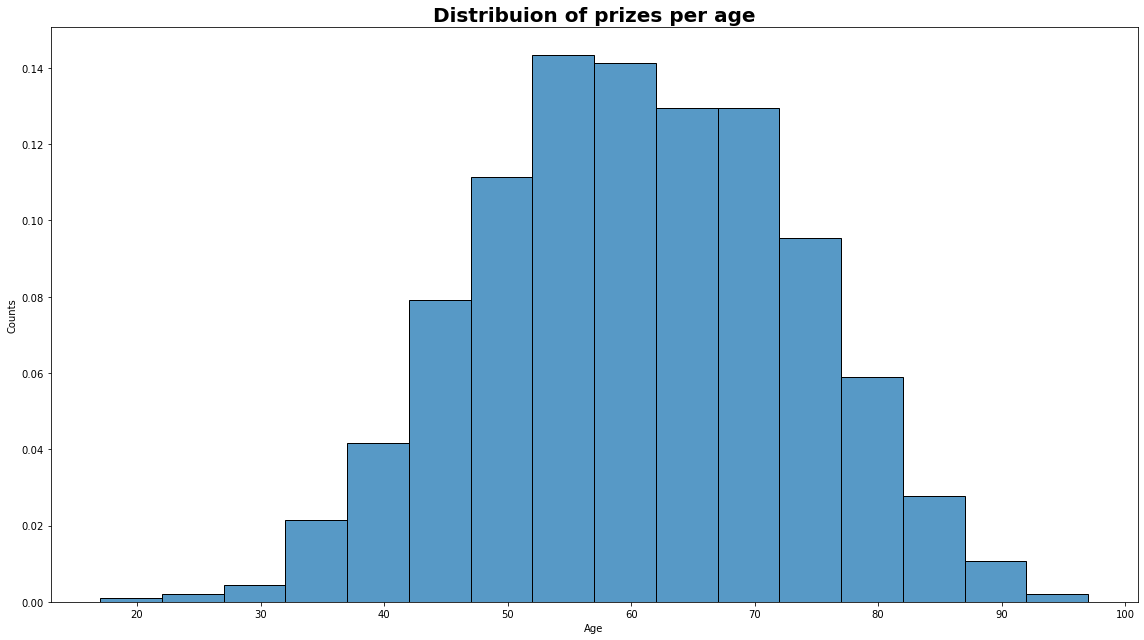

In [119]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.histplot(x='Age',
             data=df,
             stat='probability',
             binwidth=5,
             ax=ax
             )

# Formatting
ax.set_title('Distribuion of prizes per age', weight='bold', fontsize=20)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()

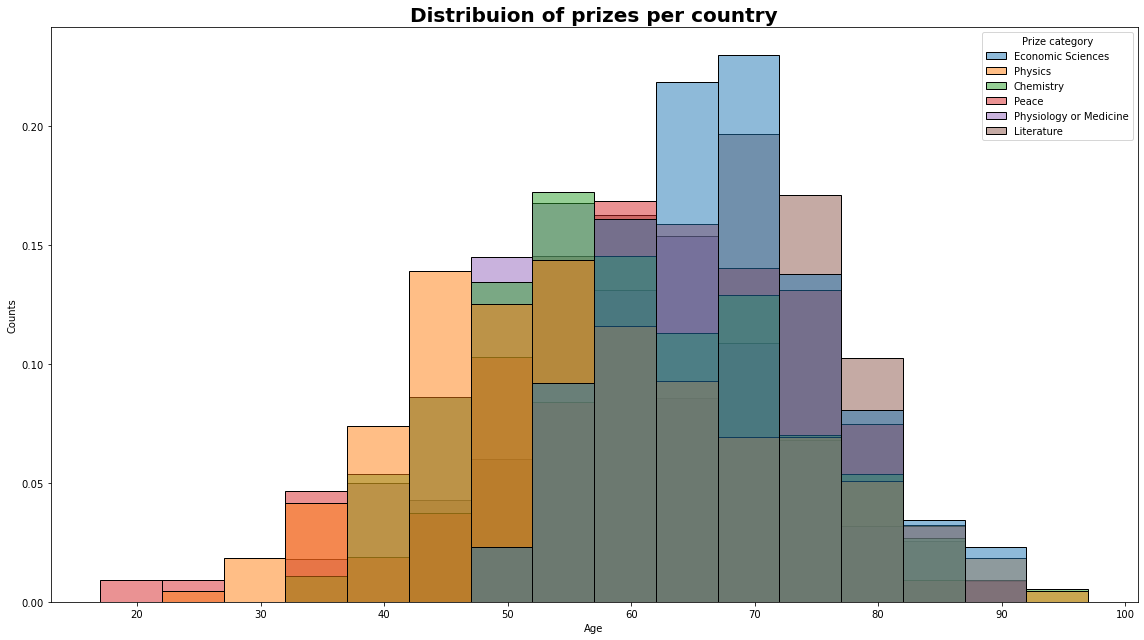

In [128]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.histplot(x='Age',
             hue='Prize category',
             data=df,
             stat='probability',
             binwidth=5,
             common_bins=True,
             common_norm=False,
             ax=ax
             )

# Formatting
ax.set_title('Distribuion of prizes per country', weight='bold', fontsize=20)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()

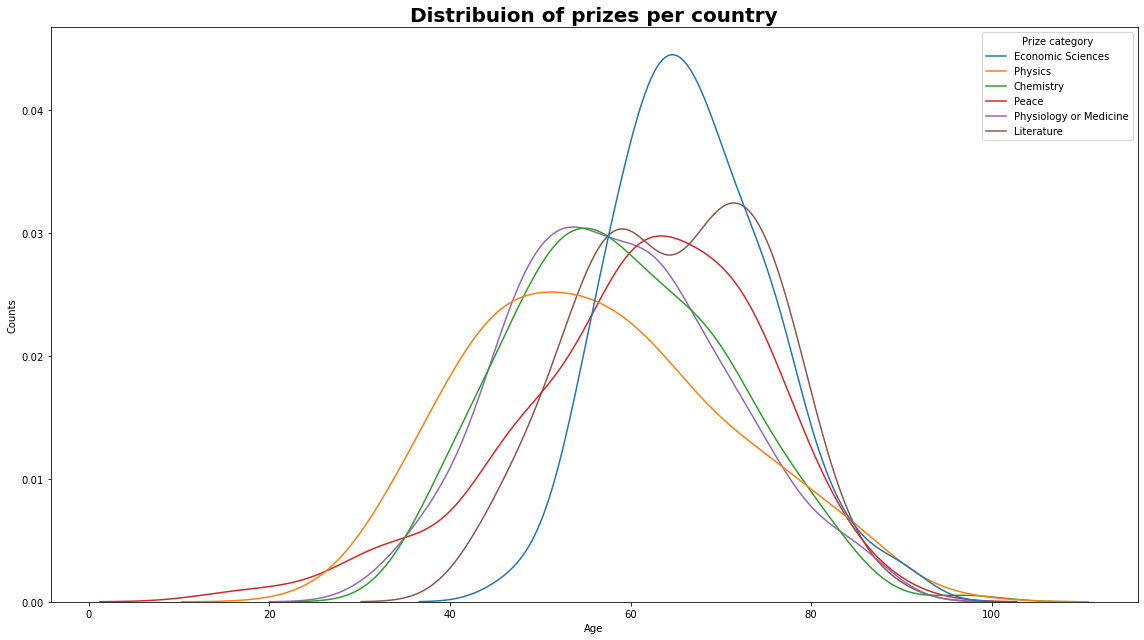

In [129]:
# Create figure
fig, ax = plt.subplots(figsize=(16,9))

# Make plot
sns.kdeplot(x='Age',
             hue='Prize category',
             data=df,
             common_grid=False,
             common_norm=False,
             ax=ax
             )

# Formatting
ax.set_title('Distribuion of prizes per country', weight='bold', fontsize=20)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')

# Show the plot
plt.tight_layout()
plt.show()